In [1]:
#Imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Exploring the data

In this section we will clean and prepare the dataset for analysis. The target class is labeled 'hazardous' which indicates if an asteroid is hazardous or not. We will be using the other variables to predict if a given asteroid is hazardous.

In [2]:
#Read in the data
df = pd.read_csv('neo_v2.csv')
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


(1) Bool objects will be converted to binary values <br>
(2) There is no missing data <br>
(3) Id and name will be dropped <br>
(4) orbiting_body and sentry_object will be dropped since they only have one type of entry.

In [4]:
sub_df = df.drop(['id','name','orbiting_body','sentry_object'],axis=1)

In [5]:
#Convert target class to binary values
sub_df['hazardous'] = [0 if entry==False else 1 for entry in sub_df['hazardous']]

In [6]:
#Analyze class bias
haz = sub_df['hazardous'].sum() / sub_df['hazardous'].count()
print('% Hazardous Asteroids: ',round(haz,3))
print('% Non-Hazardous Asteroids: ',round(1-haz,3))

% Hazardous Asteroids:  0.097
% Non-Hazardous Asteroids:  0.903


Only about 10% of the dataset contains examples of a hazardous asteroid. Luckily we have 90,000+ samples to use in our analysis but we should still keep in mind that this bias can affect our model's ability to make predicitons. We should be particularly careful when splitting the data for training/testing as we might end up with a training set that has very few examples of hazardous asteroids to learn from. This will be explored more in the predictive-modeling section.

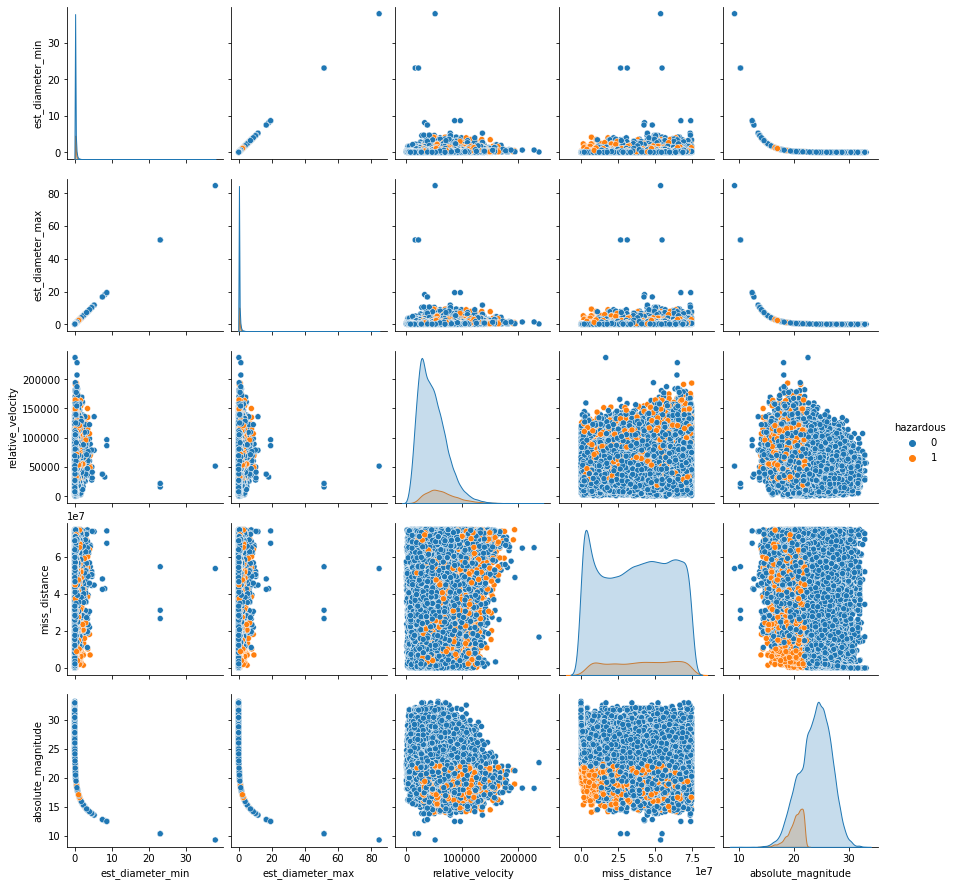

In [7]:
#Explore relationships between variables
sns.pairplot(sub_df,hue='hazardous')

The data for hazardous and non-hazardous asteroids are pretty well mixed; our models might have a hard time finding patterns to identify our target class. Let's see how we do!

# Predictive Modeling

In this section we will build predictive models using various machine-learning techniques. After comparing the models, we will decide which model would be best suited for our purpose. 

In [8]:
#Imports

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Metrics/Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [9]:
#Prepping data for model fitting
X = np.array(sub_df.drop('hazardous',axis=1))
Y = np.array(sub_df['hazardous'])

In [10]:
#Function to test a model with many train/test splits to get average model accuracy
def Avg_Model_Accuracy(X,Y,model,model_name,nsplits,test_size=0.3,kde=False):
    model_acc =[]
    for split in range(nsplits):
        print('Iteratiton: ',split+1, end='\r')
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=test_size)
        model.fit(XTRAIN,YTRAIN)
        YPRED = model.predict(XTEST)
        model_acc.append(accuracy_score(YTEST,YPRED))
    model_mean = round(np.mean(model_acc),3)
    model_2sd=round(2*np.std(model_acc),3)
    print(f'{model_name} Mean Accuracy: {model_mean} +/- {model_2sd}')
    if kde == True:
        sns.kdeplot(model_acc)

In order to compare the models, we will use a common test/train split:

In [11]:
#Control split for model comparison. Lowercase variable names used to indicate our control split. 
xtest, xtrain, ytest, ytrain = train_test_split(X,Y,test_size=0.4,shuffle=True)

### Logistic Regression

In [12]:
logmodel = LogisticRegression()
logmodel.fit(xtrain,ytrain)
logpreds = logmodel.predict(xtest)
print(classification_report(ytest,logpreds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     49315
           1       0.00      0.00      0.00      5186

    accuracy                           0.90     54501
   macro avg       0.45      0.50      0.48     54501
weighted avg       0.82      0.90      0.86     54501



C:\Users\leave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
np.unique(logpreds)

array([0], dtype=int64)

The line above shows that our model was only predicting that the asteroid was non-hazardous (0's only). As we can see, the model accruacy coincides with the class bias. This model suggests that we just assume every asteroid we get data on is non-hazardous, and 90% of the time we will be right. This might not be the best strategy, however, so we will explore other models to see if we can achieve better results.

### K-Nearest Neighbors

In [14]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(xtrain,ytrain)
KNNpreds = KNN.predict(xtest)
print(classification_report(ytest,KNNpreds))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     49315
           1       0.17      0.02      0.04      5186

    accuracy                           0.90     54501
   macro avg       0.54      0.51      0.49     54501
weighted avg       0.84      0.90      0.86     54501



Looks like a KNN model is including 1's in the predicitons! Let's see if we can identify the most optimal value for K and then run many models to generalize the model performance.

In [15]:
#Selecting a value for KNN

def optimize_k(X,Y):
    error_rate = 1
    optim_k = 0
    for i in range(1,40):
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
        KNN = KNeighborsClassifier(n_neighbors=i)
        KNN.fit(XTRAIN,YTRAIN)
        pred_i = KNN.predict(XTEST)
        err = np.mean(pred_i != YTEST)
        if err < error_rate:
            error_rate = err
            optim_k = i
    return optim_k

def best_performing_k(X,Y,n_iters=500):
    k_list = []
    for i in range(n_iters):
        print('Iteratiton: ',i+1, end='\r')
        k_list.append(optimize_k(X,Y))
    k, counts = np.unique(k_list,return_counts=True)
    best_idx = list(counts).index(np.max(counts))
    sns.countplot(x=k_list)
    print('Best K: ',k[best_idx])

Best K:  25  100


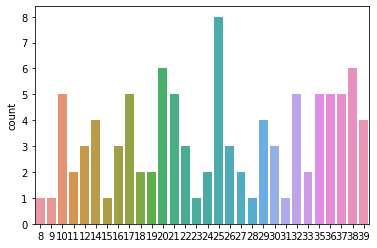

In [16]:
#This takes a long time
best_performing_k(X,Y,100)

From the plot above, we can see that the most optimal K value is dependent on the test/train split. This function only evaluated up to k=40, however it should be noted that it is possible that a more optimal K lies beyond 40. Based on the current analysis, the best value of K to use is 25, although there were more K values that appeared almost as often. It would be more insightful to run best_performing_k for at least 5000 iterations to obtain a more clearly defined distribution of optimal K values (that would take forever). Since our data set is fairly large and this process is slow, we will try a model based on this information with K=25.

In [17]:
KNN25 = KNeighborsClassifier(n_neighbors=25)
KNN25.fit(xtrain,ytrain)
KNN25preds = KNN25.predict(xtest)
print(classification_report(ytest,KNN25preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     49315
           1       0.00      0.00      0.00      5186

    accuracy                           0.90     54501
   macro avg       0.45      0.50      0.48     54501
weighted avg       0.82      0.90      0.86     54501



C:\Users\leave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Because of the class bias, we again run into the issue of predicting only 0's (on K=25). Because of this we will continue analysis based on the first model which was K=5

KNN Mean Accuracy: 0.894 +/- 0.003


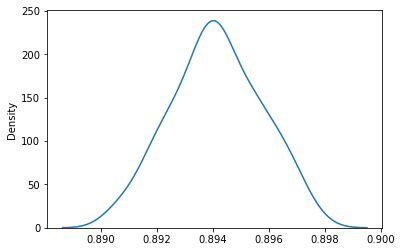

In [18]:
Avg_Model_Accuracy(X,Y,KNN,'KNN',nsplits=100,kde=True)

The results are not so exciting; our average accuracy hovers around the class bias (it's as good as predicting all 0's). we will probably not select KNN as our final model.

### Discriminant Analysis

In [19]:
LDA=LinearDiscriminantAnalysis()
QDA=QuadraticDiscriminantAnalysis()

In [20]:
LDA.fit(xtrain,ytrain)
LDA_preds = LDA.predict(xtest)
print(classification_report(ytest,LDA_preds))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     49315
           1       0.31      0.06      0.11      5186

    accuracy                           0.90     54501
   macro avg       0.61      0.52      0.53     54501
weighted avg       0.85      0.90      0.87     54501



In [21]:
QDA.fit(xtrain,ytrain)
QDA_preds = QDA.predict(xtest)
print(classification_report(ytest,QDA_preds))

              precision    recall  f1-score   support

           0       0.91      0.25      0.40     49315
           1       0.10      0.75      0.17      5186

    accuracy                           0.30     54501
   macro avg       0.50      0.50      0.28     54501
weighted avg       0.83      0.30      0.38     54501



C:\Users\leave\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


We seem to be getting similar results with both linear and quadratic discriminant analysis. We'll see if another model might perform better.

### Gaussian Naive Bayes

In [22]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
gnb_preds = gnb.predict(xtest)
print(classification_report(ytest,gnb_preds))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     49315
           1       0.28      0.04      0.06      5186

    accuracy                           0.90     54501
   macro avg       0.60      0.51      0.51     54501
weighted avg       0.85      0.90      0.86     54501



Again we have results similar to the previous models (this may be because of the class bias).

## Conclusion

All of the models we tried had an accuracy close to 90% which coincides with the class bias present in the data set. Some of the models were just guessing all 0's (non-hazardous) which is not the best strategy, while others were actually able to guess some of the hazardous asteroids correctly. In its current state, the dataset does not provide enough information for these models to identify hazardous asteroids at an acceptable rate. This problem may be revisited if more information about each asteroid can be provided by NASA.